In [2]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [3]:
IMAGE_SIZE = 250
BATCH_SIZE = 32

In [4]:
EPOCHS = 50
CHANNELS = 3

In [5]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "Images",
    shuffle=True,
    image_size= (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 502 files belonging to 2 classes.


In [7]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "Images",
    shuffle=True,
    image_size= (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 502 files belonging to 2 classes.


In [64]:
class_name = dataset.class_names
class_name

['diseased', 'undiseased']

In [9]:
len(dataset)

16

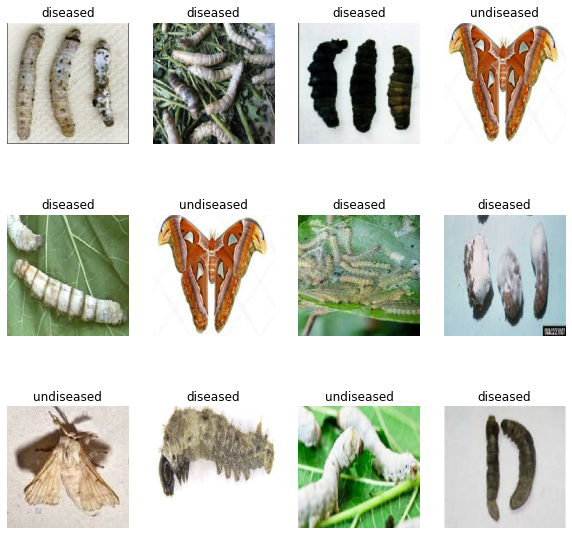

In [10]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_name[label_batch[i]])
        plt.axis("off")

In [11]:
len(dataset)

16

In [12]:
train_size = 0.7
len(dataset)*train_size

11.2

In [13]:
train_ds=dataset.take(11)
len(train_ds)

11

In [14]:
test_ds = dataset.skip(11)
len(test_ds)

5

In [15]:
val_size=0.1
len(dataset)*val_size

1.6

In [16]:
val_ds=test_ds.take(1)
len(val_ds)

1

In [17]:
test_ds = test_ds.skip(1)
len(test_ds)

4

In [47]:
def get_dataset_partitions_tf(ds, train_split=0.7, val_split=0.15, test_split=0.15, shuffle=True, shuffle_size=10000):
    ds_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size + val_size)
    return train_ds, val_ds, test_ds

In [48]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [49]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [50]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [51]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [52]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

In [53]:
model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])
model.build(input_shape=(None, *input_shape))

In [54]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_4 (Sequential)   (None, 250, 250, 3)       0         
                                                                 
 sequential_5 (Sequential)   (None, 250, 250, 3)       0         
                                                                 
 conv2d_12 (Conv2D)          (None, 248, 248, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 124, 124, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (None, 122, 122, 64)      18496     
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 61, 61, 64)        0         
 ng2D)                                                

In [55]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [69]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=50,
)

Epoch 1/50
11/11 [==============================] - 12s 895ms/step - loss: 0.8042 - accuracy: 0.4886 - val_loss: 0.6934 - val_accuracy: 0.5199
Epoch 2/50
11/11 [==============================] - 10s 925ms/step - loss: 0.6978 - accuracy: 0.4773 - val_loss: 0.6907 - val_accuracy: 0.5256
Epoch 3/50
11/11 [==============================] - 10s 951ms/step - loss: 0.7041 - accuracy: 0.5199 - val_loss: 0.7053 - val_accuracy: 0.5256
Epoch 4/50
11/11 [==============================] - 10s 906ms/step - loss: 0.7019 - accuracy: 0.5511 - val_loss: 0.6770 - val_accuracy: 0.5540
Epoch 5/50
11/11 [==============================] - 12s 1s/step - loss: 0.7030 - accuracy: 0.5028 - val_loss: 0.6878 - val_accuracy: 0.5057
Epoch 6/50
11/11 [==============================] - 12s 1s/step - loss: 0.6944 - accuracy: 0.5369 - val_loss: 0.6550 - val_accuracy: 0.6818
Epoch 7/50
11/11 [==============================] - 11s 1s/step - loss: 0.6336 - accuracy: 0.6477 - val_loss: 0.6021 - val_accuracy: 0.7188
Epoch 8/

In [30]:
scores = model.evaluate(test_ds)

11/11 [==============================] - 2s 203ms/step - loss: 0.0925 - accuracy: 0.9574


In [31]:
scores

[0.09250519424676895, 0.9573863744735718]

In [32]:
history

In [33]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 11}

In [34]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [35]:
history.history['accuracy']

[0.53125,
 0.5767045617103577,
 0.5482954382896423,
 0.5397727489471436,
 0.59375,
 0.6136363744735718,
 0.5767045617103577,
 0.6335227489471436,
 0.6988636255264282,
 0.7329545617103577,
 0.7613636255264282,
 0.7414772510528564,
 0.8011363744735718,
 0.8068181872367859,
 0.8267045617103577,
 0.8096590638160706,
 0.8494318127632141,
 0.8494318127632141,
 0.8125,
 0.9005681872367859,
 0.7414772510528564,
 0.8011363744735718,
 0.8295454382896423,
 0.8465909361839294,
 0.8693181872367859,
 0.9147727489471436,
 0.875,
 0.8835227489471436,
 0.9005681872367859,
 0.8693181872367859,
 0.8948863744735718,
 0.8380681872367859,
 0.8238636255264282,
 0.875,
 0.8721590638160706,
 0.8863636255264282,
 0.8977272510528564,
 0.9318181872367859,
 0.9346590638160706,
 0.9289772510528564,
 0.9375,
 0.9630681872367859,
 0.9488636255264282,
 0.9630681872367859,
 0.9602272510528564,
 0.96875,
 0.9602272510528564,
 0.9602272510528564,
 0.9602272510528564,
 0.9573863744735718]

In [56]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

In [57]:
loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Accuracy')

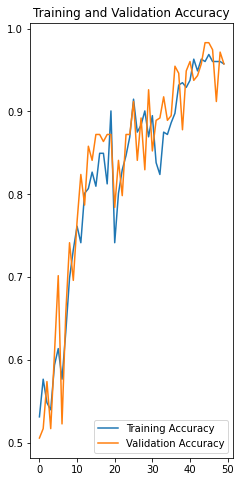

In [58]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

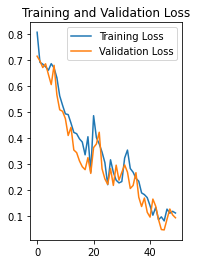

In [59]:
plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: diseased
1/1 [==============================] - 0s 446ms/step
predicted label: diseased


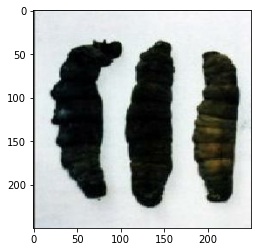

In [60]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_name[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_name[np.argmax(batch_prediction[0])])

In [66]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.image.resize(img_array, (IMAGE_SIZE, IMAGE_SIZE))
    img_array = tf.expand_dims(img_array, 0)  # Create batch axis
    predictions = model.predict(img_array)
    predicted_class = class_name[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 65ms/step


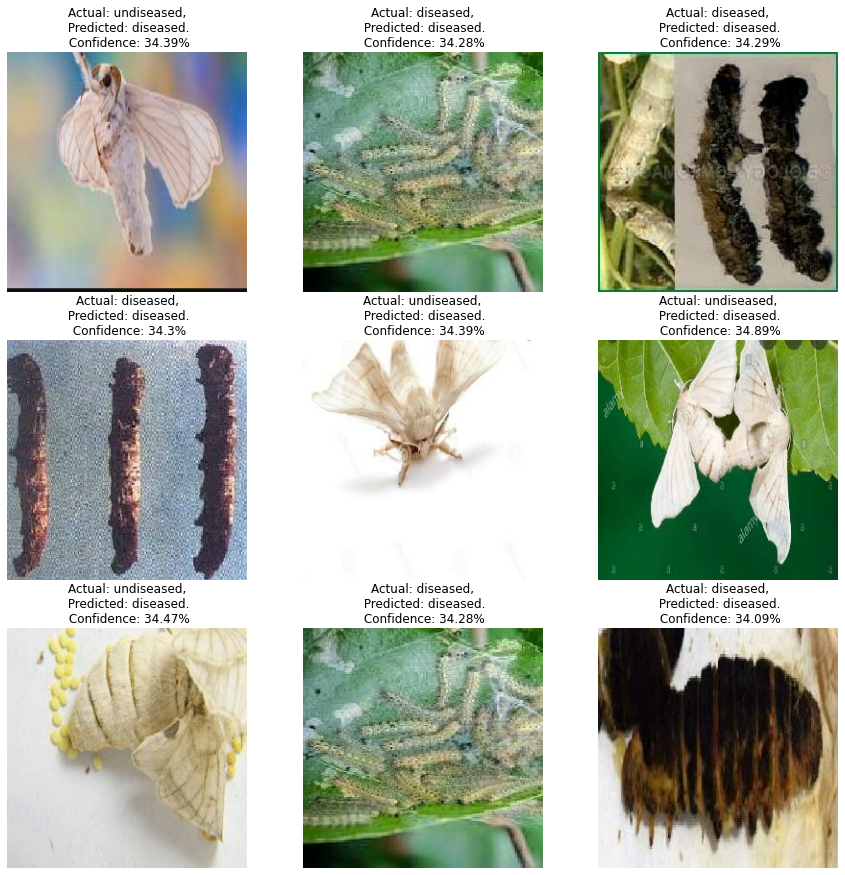

In [67]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_name[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

1/1 [==============================] - 0s 222ms/step


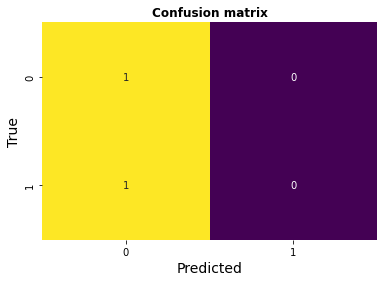

              precision    recall  f1-score   support

           0       0.53      1.00      0.69       185
           1       0.00      0.00      0.00       167

    accuracy                           0.53       352
   macro avg       0.26      0.50      0.34       352
weighted avg       0.28      0.53      0.36       352



C:\Users\Harsha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Harsha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Harsha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [68]:
from collections import Counter
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

y_pred = []  # store predicted labels
y_true = []  # store true labels

# iterate over the dataset
for image_batch, label_batch in val_ds:  
   # append true labels
   y_true.append(label_batch)
   # compute predictions
   preds = model.predict(image_batch)
   # append predicted labels
   y_pred.append(np.argmax(preds, axis = - 1))

# convert the true and predicted labels into tensors
correct_labels = tf.concat([item for item in y_true], axis = 0)
predicted_labels = tf.concat([item for item in y_pred], axis = 0)

# Confusion matrix
cm = confusion_matrix(correct_labels, predicted_labels, normalize='true')

sns.heatmap(cm, annot=True, cmap='viridis', cbar=None)

plt.title("Confusion matrix", fontweight='bold')
plt.ylabel("True", fontsize=14)
plt.xlabel("Predicted", fontsize=14)

plt.show()

print(classification_report(correct_labels, predicted_labels))

In [45]:
import os
model_version=1
model.save(f"C:/Users/Harsha/Project/models/{model_version}")

INFO:tensorflow:Assets written to: C:/Users/Harsha/Project/models/1\assets


INFO:tensorflow:Assets written to: C:/Users/Harsha/Project/models/1\assets


In [46]:
model.save("C:/Users/Harsha/Project/models/silkworm.keras")

In [ ]:
pip install tensorflowjs

In [ ]:
!tensorflowjs_converter --input_format=keras \
    /C:\Users\Harsha\Project\models\silkworm.h5 \
    /C:\Users\Harsha\Project\my_model_tfjs

In [ ]:
pip install h5py

In [ ]:
import h5py

# Open the HDF5 file in read mode
with h5py.File(r'C:/Users/Harsha/Project/models/silkworm.h5', 'r') as file:
    # List all groups and datasets in the file
    print("Keys: ", list(file.keys()))

    # Access a specific dataset
    dataset = file['C:/Users/Harsha/Project/Images']
    
    # Read data from the dataset
    data = dataset[()]  # This loads the entire dataset into memory
    print("Data shape:", data.shape)
    
    # Access attributes of the dataset
    for key, value in dataset.attrs.items():
        print(f"{key}: {value}")

    


In [ ]:
import h5py

# Open the HDF5 file
file_path = r'C:/Users/Harsha/Project/Images'
with h5py.File(file_path, 'r') as file:
    # Print the keys
    print("Keys: ", list(file.keys()))

In [ ]:
echo %PYTHONPATH%

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    #img_array = tf.image.resize(img,(250,250))
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_name[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

def visualize_prediction(model, image_path):
    # Load the external image
    img = tf.keras.preprocessing.image.load_img(image_path,target_size=(250,250))

    # Display the image
    plt.imshow(img)
    plt.axis("off")
    plt.show()

    # Make a prediction
    predicted_class, confidence = predict(model, img)

    # Display the prediction
    print(f"Predicted Class Index: {predicted_class}\nConfidence: {confidence}%")

# Replace 'path_to_external_image.jpg' with the actual path to your external image
image_path = 'C:/Users/Harsha/Downloads/hi.jpg'
visualize_prediction(model, image_path)


In [ ]:
import tensorflow as tf

# Load your trained model
model = tf.keras.models.load_model('C:/Users/Harsha/Project/models/silkworm.h5')

# Convert the model to TFLite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the TFLite model to a file
with open('C:/Users/Harsha/Project/models/my_model.tflite', 'wb') as f:
    f.write(tflite_model)
